In [1]:
import json
import numpy as np
import matplotlib
from matplotlib import style
style.use('ggplot')
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import os
os.environ['pandeia_refdata'] = "/home/maryhallow/Desktop/python/Reionizatoin/JWSTUserTraining2016/pandeia_data"
os.environ['PYSYN_CDBS'] = "/home/maryhallow/Desktop/python/Reionizatoin/JWSTUserTraining2016/cdbs.23.1.rc3"

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc

In [14]:
calc_input = build_default_calc('jwst', 'nircam', 'sw_imaging')
calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 5e-3  # mJy (flat spectrum)
calc_input['scene'][0]['spectrum']['normalization']['norm_wave'] = 1.5   # microns

calc_input['background'] = 'low'

calc_input['configuration']['instrument']['filter'] = 'f150w'
calc_input['configuration']['detector']['nexp'] = 1

calc_input['strategy']['aperture_size'] = 0.1
calc_input['strategy']['sky_annulus'] = [0.22, 0.4]

report = perform_calculation(calc_input, dict_report=False, webapp=True)
report_dict = report.as_dict()
report_fits = report.as_fits()

print(report_dict['scalar'])

/home/maryhallow/anaconda3/envs/jwst-workshop/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


{'sn': 296.67546098087826, 'cr_ramp_rate': 0.1551109231922884, 'background': 0.17431086000624507, 'extracted_flux': 130.8026321112336, 'extracted_noise': 0.4408946789153697, 'on_source_time': 1954.68, 'x_offset': 0.0, 'background_total': 6.0007390870623265, 'reference_wavelength': 1.4908857866904432, 'extraction_area': 30.679615757712813, 'y_offset': 0.0, 'background_area': 342.38451185607505, 'background_sky': 4.954316527597072, 'contamination': 0.17438227929645456, 'all_dithers_time': 1954.68, 'disperser': None, 'aperture_size': 0.1, 'filter': 'f150w'}


<IPython.core.display.Javascript object>


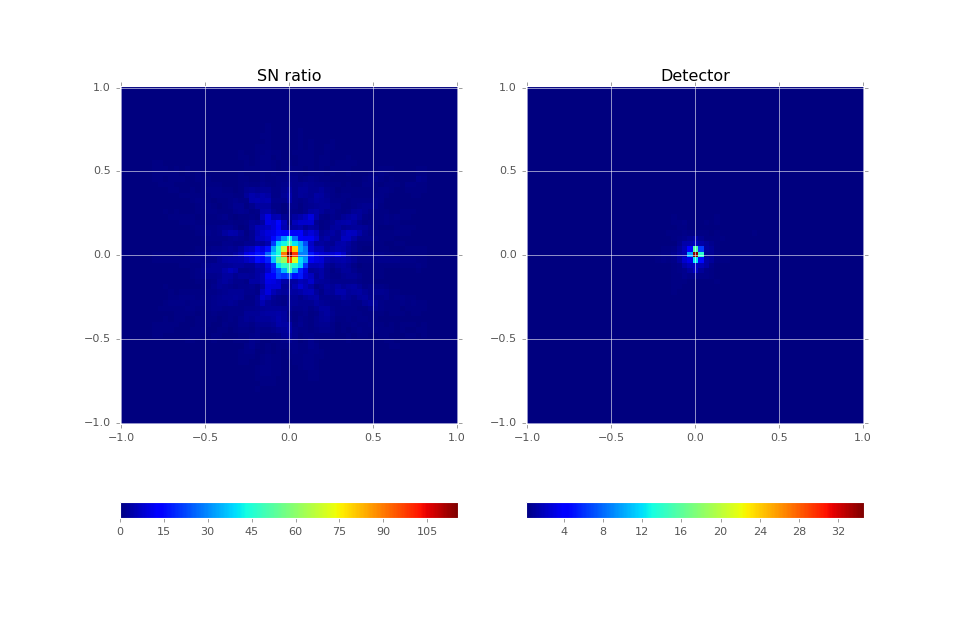

In [15]:
plt.figure(1)

t = report_dict['transform']
extent = [t['x_min'], t['x_max'], t['y_min'], t['y_max']]

plt.subplot(1,2,1)
plt.title('SN ratio')
plt.imshow(report_dict['2d']['snr'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')

plt.subplot(1,2,2)
plt.title('Detector')
plt.imshow(report_dict['2d']['detector'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')


plt.show()

In [7]:
calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 0e0  # mJy (flat spectrum)

report2 = perform_calculation(calc_input, dict_report=False, webapp=True)
report2_dict = report2.as_dict()
report2_fits = report2.as_fits()

print(report2_dict['scalar'])

/home/maryhallow/anaconda3/envs/jwst-workshop/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


{'sn': 0.0, 'cr_ramp_rate': 0.1551109231922884, 'background': 0.17431343430511331, 'extracted_flux': 0.0, 'extracted_noise': nan, 'on_source_time': 1954.68, 'x_offset': 0.0, 'background_total': 4.954316527597072, 'reference_wavelength': 1.4782991152612255, 'extraction_area': 30.679615757712813, 'y_offset': 0.0, 'background_area': 342.38451185607505, 'background_sky': 4.954316527597072, 'contamination': 0.0, 'all_dithers_time': 1954.68, 'disperser': None, 'aperture_size': 0.1, 'filter': 'f150w'}


<IPython.core.display.Javascript object>


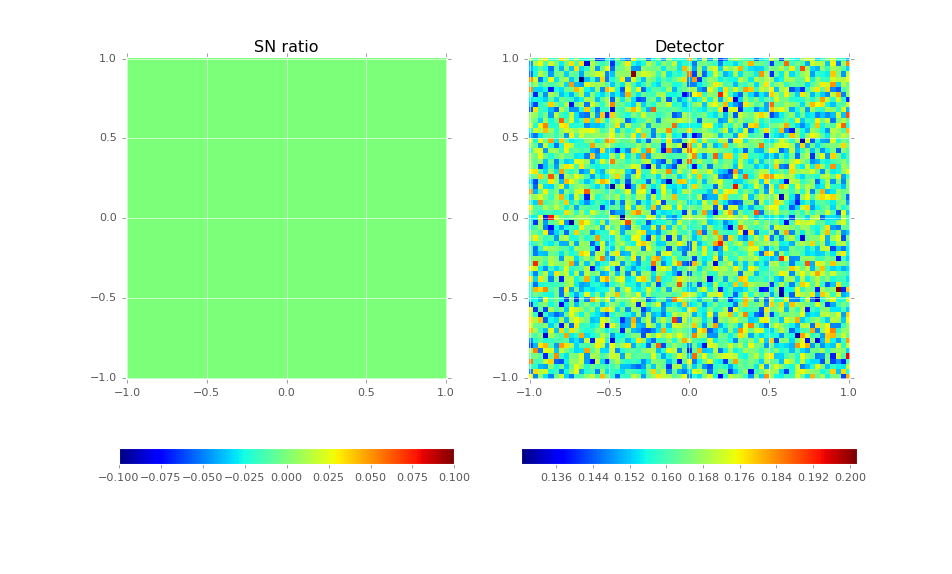

In [11]:
plt.figure(2)

t = report2_dict['transform']
extent = [t['x_min'], t['x_max'], t['y_min'], t['y_max']]

plt.subplot(1,2,1)
plt.title('SN ratio')
plt.imshow(report2_dict['2d']['snr'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')

plt.subplot(1,2,2)
plt.title('Detector')
plt.imshow(report2_dict['2d']['detector'], interpolation='nearest', extent=extent)
plt.colorbar(orientation='horizontal')


plt.show()